In [23]:
## Libraries used
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### (1) Data preprocessing and visualization

In [16]:
data = pd.read_csv('creditcard.csv',sep=',')

print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [89]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
#Stats on feature values in the dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


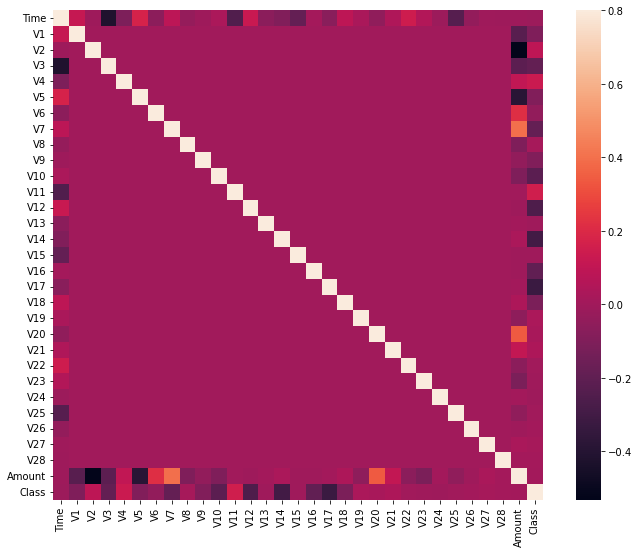

In [18]:
##Correlation Matrix 1
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [108]:
## Size of dataset
Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]

print("Dimensions of the dataset")
print(data.shape)
print(Fraud.shape)
print(Valid.shape)

Dimensions of the dataset
(284807, 31)
(492, 31)
(284315, 31)


In [109]:
print("Preprocessing to make the data less skewed")
Valid = Valid.sample(1000)
new_data = Valid.append(Fraud)
New_Fraud = new_data[new_data['Class']==1]
New_Valid = new_data[new_data['Class']==0]
print(new_data.shape)
print(New_Fraud.shape)
print(New_Valid.shape)

Preprocessing to make the data less skewed
(1492, 31)
(492, 31)
(1000, 31)


In [125]:
# ## Correlation Matrix 2
# colormap = plt.cm.viridis
# plt.figure(figsize=(12,12))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(new_data.astype(float).corr(),linewidths=0.005,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [91]:
## Performing train and test split
columns = new_data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = new_data[columns]
Y = new_data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

### (2) Explaining the split structure and model hyperparameters

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [123]:
pd.DataFrame(rf.feature_importances_)

,0
0,0.005895
1,0.007285
2,0.016607
3,0.015338
4,0.080293
5,0.007027
6,0.010520
7,0.038742
8,0.008311
9,0.032130


In [119]:
rf.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

[Text(418.5, 475.65000000000003, 'V12 <= -4.502\ngini = 0.004\nsamples = 180021\nvalue = [284302, 505]\nclass = Normal'),
 Text(209.25, 339.75, 'V26 <= -0.264\ngini = 0.305\nsamples = 237\nvalue = [69, 299]\nclass = Fraud'),
 Text(104.625, 203.85000000000002, 'V8 <= 0.577\ngini = 0.5\nsamples = 57\nvalue = [42, 43]\nclass = Fraud'),
 Text(52.3125, 67.94999999999999, 'gini = 0.219\nsamples = 21\nvalue = [4, 28]\nclass = Fraud'),
 Text(156.9375, 67.94999999999999, 'gini = 0.406\nsamples = 36\nvalue = [38, 15]\nclass = Normal'),
 Text(313.875, 203.85000000000002, 'V16 <= 0.61\ngini = 0.173\nsamples = 180\nvalue = [27, 256]\nclass = Fraud'),
 Text(261.5625, 67.94999999999999, 'gini = 0.117\nsamples = 172\nvalue = [17, 255]\nclass = Fraud'),
 Text(366.1875, 67.94999999999999, 'gini = 0.165\nsamples = 8\nvalue = [10, 1]\nclass = Normal'),
 Text(627.75, 339.75, 'V12 <= -3.462\ngini = 0.001\nsamples = 179784\nvalue = [284233, 206]\nclass = Normal'),
 Text(523.125, 203.85000000000002, 'V14 <= -

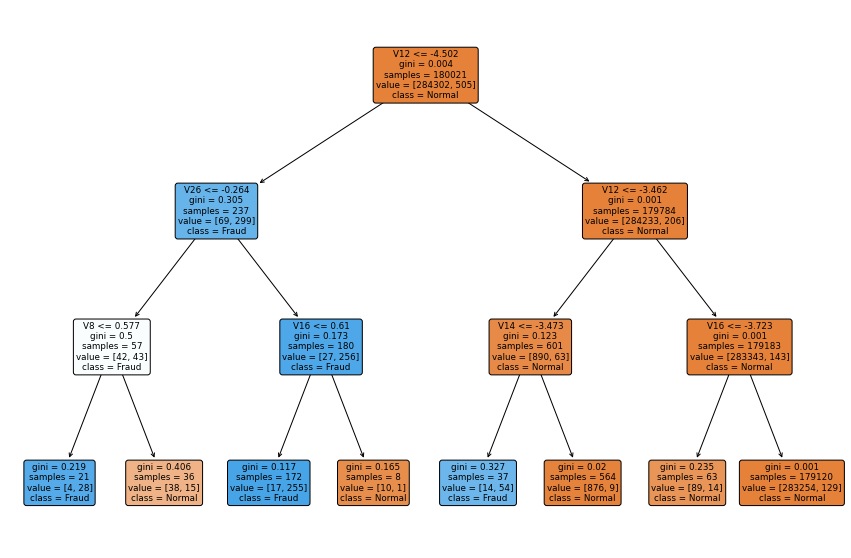

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## Split structure of first decision tree in ensemble random forest
LABELS = ["Normal", "Fraud"]
fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], 
          feature_names=columns,
          class_names=LABELS, 
          filled=True, impurity=True, 
          rounded=True)

[Text(262.52189913127415, 527.6117647058824, 'V3 <= -2.549\ngini = 0.439\nsamples = 749\nvalue = [804, 389]\nclass = Normal'),
 Text(103.41312741312741, 495.63529411764705, 'V11 <= 0.687\ngini = 0.2\nsamples = 202\nvalue = [35, 275]\nclass = Fraud'),
 Text(77.55984555984556, 463.6588235294118, 'V10 <= -0.874\ngini = 0.102\nsamples = 24\nvalue = [35, 2]\nclass = Normal'),
 Text(51.706563706563706, 431.6823529411765, 'V14 <= -1.489\ngini = 0.32\nsamples = 6\nvalue = [8, 2]\nclass = Normal'),
 Text(25.853281853281853, 399.7058823529412, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Fraud'),
 Text(77.55984555984556, 399.7058823529412, 'gini = 0.0\nsamples = 4\nvalue = [8, 0]\nclass = Normal'),
 Text(103.41312741312741, 431.6823529411765, 'gini = 0.0\nsamples = 18\nvalue = [27, 0]\nclass = Normal'),
 Text(129.26640926640925, 463.6588235294118, 'gini = 0.0\nsamples = 178\nvalue = [0, 273]\nclass = Fraud'),
 Text(421.6306708494208, 495.63529411764705, 'V17 <= -1.888\ngini = 0.225\nsamples

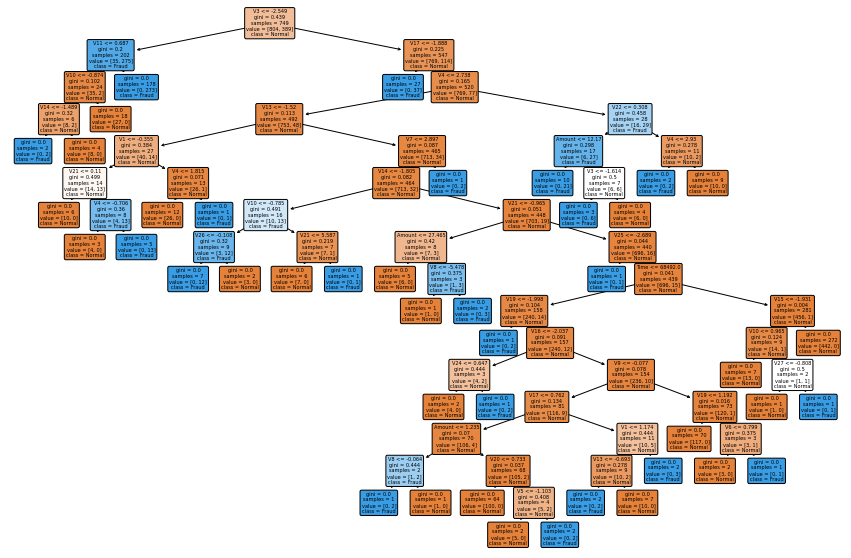

In [62]:
## Split structure of first decision tree in ensemble random forest
LABELS = ["Normal", "Fraud"]
fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[1], 
          feature_names=columns,
          class_names=LABELS, 
          filled=True, impurity=True, 
          rounded=True)

[Text(246.2424107142857, 526.6125000000001, 'V9 <= -2.287\ngini = 0.437\nsamples = 758\nvalue = [808, 385]\nclass = Normal'),
 Text(134.51785714285714, 492.63750000000005, 'V10 <= -0.058\ngini = 0.049\nsamples = 115\nvalue = [5, 194]\nclass = Fraud'),
 Text(110.60357142857143, 458.6625, 'gini = 0.0\nsamples = 112\nvalue = [0, 194]\nclass = Fraud'),
 Text(158.43214285714285, 458.6625, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]\nclass = Normal'),
 Text(357.9669642857143, 492.63750000000005, 'V16 <= -1.808\ngini = 0.31\nsamples = 643\nvalue = [803, 191]\nclass = Normal'),
 Text(206.2607142857143, 458.6625, 'V12 <= -1.078\ngini = 0.224\nsamples = 81\nvalue = [15, 102]\nclass = Fraud'),
 Text(182.34642857142856, 424.6875, 'gini = 0.0\nsamples = 70\nvalue = [0, 101]\nclass = Fraud'),
 Text(230.175, 424.6875, 'V22 <= -0.472\ngini = 0.117\nsamples = 11\nvalue = [15, 1]\nclass = Normal'),
 Text(206.2607142857143, 390.7125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Fraud'),
 Text(254.08928

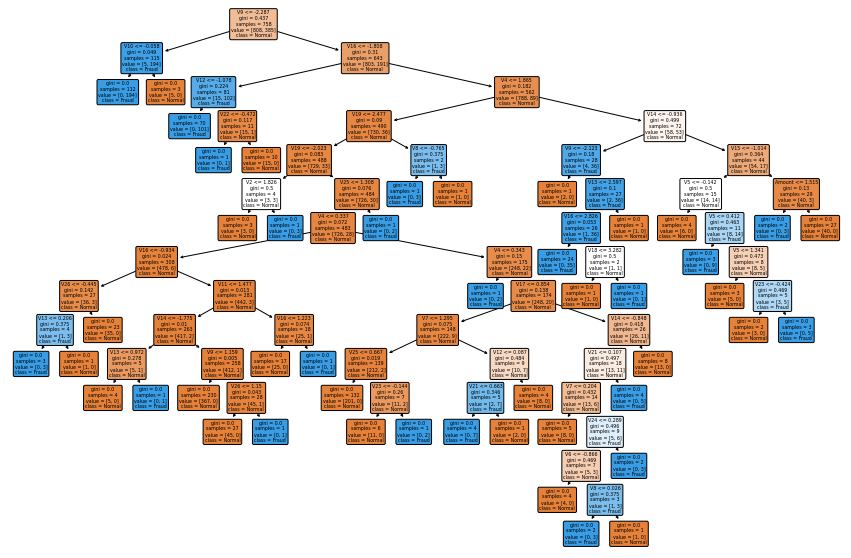

In [68]:
## Split structure of first decision tree in ensemble random forest
LABELS = ["Normal", "Fraud"]
fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[5], 
          feature_names=columns,
          class_names=LABELS, 
          filled=True, impurity=True, 
          rounded=True)

[Text(361.41017857142856, 528.5, 'V10 <= -1.93\ngini = 0.448\nsamples = 752\nvalue = [789, 404]\nclass = Normal'),
 Text(79.36, 498.3, 'V11 <= -0.494\ngini = 0.051\nsamples = 211\nvalue = [9, 333]\nclass = Fraud'),
 Text(56.68571428571428, 468.1, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]\nclass = Normal'),
 Text(102.0342857142857, 468.1, 'V24 <= -1.7\ngini = 0.023\nsamples = 208\nvalue = [4, 333]\nclass = Fraud'),
 Text(45.348571428571425, 437.9, 'V15 <= 0.34\ngini = 0.5\nsamples = 2\nvalue = [2, 2]\nclass = Normal'),
 Text(22.674285714285713, 407.70000000000005, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]\nclass = Normal'),
 Text(68.02285714285713, 407.70000000000005, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]\nclass = Fraud'),
 Text(158.72, 437.9, 'V23 <= -1.576\ngini = 0.012\nsamples = 206\nvalue = [2, 331]\nclass = Fraud'),
 Text(113.37142857142857, 407.70000000000005, 'V14 <= -2.736\ngini = 0.198\nsamples = 5\nvalue = [1, 8]\nclass = Fraud'),
 Text(90.69714285714285, 377.5, 'gini = 0.0\

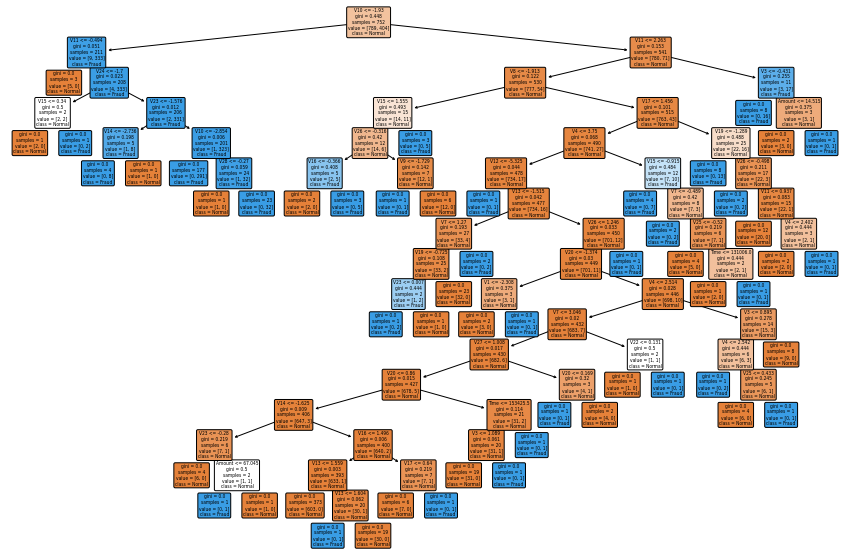

In [69]:
## Split structure of first decision tree in ensemble random forest
LABELS = ["Normal", "Fraud"]
fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[40], 
          feature_names=columns,
          class_names=LABELS, 
          filled=True, impurity=True, 
          rounded=True)

[Text(437.6770582932692, 527.6117647058824, 'V12 <= -2.53\ngini = 0.436\nsamples = 758\nvalue = [810, 383]\nclass = Normal'),
 Text(296.2698317307692, 495.63529411764705, 'V2 <= 0.182\ngini = 0.138\nsamples = 205\nvalue = [24, 298]\nclass = Fraud'),
 Text(264.07752403846155, 463.6588235294118, 'V1 <= -1.936\ngini = 0.5\nsamples = 23\nvalue = [18, 19]\nclass = Fraud'),
 Text(247.9813701923077, 431.6823529411765, 'gini = 0.0\nsamples = 10\nvalue = [0, 17]\nclass = Fraud'),
 Text(280.1736778846154, 431.6823529411765, 'Amount <= 563.76\ngini = 0.18\nsamples = 13\nvalue = [18, 2]\nclass = Normal'),
 Text(264.07752403846155, 399.7058823529412, 'gini = 0.0\nsamples = 11\nvalue = [18, 0]\nclass = Normal'),
 Text(296.2698317307692, 399.7058823529412, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Fraud'),
 Text(328.46213942307696, 463.6588235294118, 'V16 <= -0.363\ngini = 0.041\nsamples = 182\nvalue = [6, 279]\nclass = Fraud'),
 Text(312.3659855769231, 431.6823529411765, 'gini = 0.0\nsamples

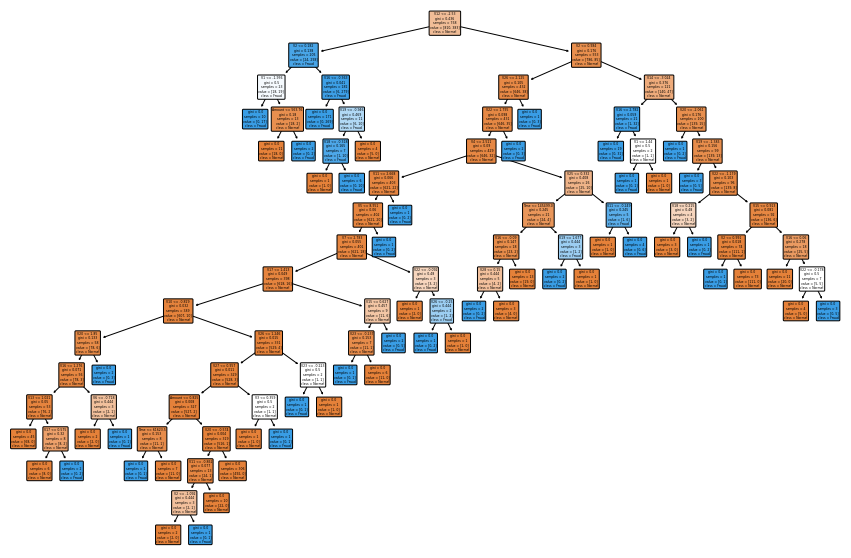

In [75]:
## Split structure of first decision tree in ensemble random forest
LABELS = ["Normal", "Fraud"]
fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[99], 
          feature_names=columns,
          class_names=LABELS, 
          filled=True, impurity=True, 
          rounded=True)

### (3) Training accuracy Single Decision Tree vs Random Forest

In [45]:
## Calculate test accuracy
rf.score(X_test, Y_test)

0.9531772575250836

In [46]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.9364548494983278

In [124]:
clf.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

### (3) Training time Random Forest vs Single Decision Tree

In [86]:
import time

In [87]:
clf = DecisionTreeClassifier(random_state=0)
t0 = time.time()
clf.fit(X_train, Y_train)
t1 = time.time()
print("Training time for single decision tree: ", t1 - t0)

Training time for single decision tree:  0.04790091514587402


In [88]:
rf = RandomForestClassifier()
t0 = time.time()
rf.fit(X_train, Y_train)
t1 = time.time()
print("Training time for single decision tree: ", t1 - t0)

Training time for single decision tree:  0.27654504776000977


### (4) Plotting top and bottom 10 accuracies of trees in Random Forests

In [85]:
fig = plt.figure(figsize=(15, 10))
acc_scores = []
for n in range(0,100):
    dt=rf.estimators_[n]
    dt = dt.fit(X_train, Y_train)
    Y_pred = dt.predict(X_test)
    decision_tree_acc= accuracy_score(Y_test, Y_pred)
    acc_scores.append(decision_tree_acc)
acc_scores.sort()
max_10 = acc_scores[-10:]
min_10 = acc_scores[:10]
print("Top 10 tree accuracies")
for i in range(10):
    print("The accuracy of the decision tree ",i, " is ",max_10[i])
print("Bottom 10 tree accuracies")
for i in range(10):
    print("The accuracy of the decision tree ",i, " is ",min_10[i])

Top 10 tree accuracies
The accuracy of the decision tree  0  is  0.939799331103679
The accuracy of the decision tree  1  is  0.939799331103679
The accuracy of the decision tree  2  is  0.939799331103679
The accuracy of the decision tree  3  is  0.939799331103679
The accuracy of the decision tree  4  is  0.939799331103679
The accuracy of the decision tree  5  is  0.939799331103679
The accuracy of the decision tree  6  is  0.9431438127090301
The accuracy of the decision tree  7  is  0.9431438127090301
The accuracy of the decision tree  8  is  0.9431438127090301
The accuracy of the decision tree  9  is  0.9464882943143813
Bottom 10 tree accuracies
The accuracy of the decision tree  0  is  0.8896321070234113
The accuracy of the decision tree  1  is  0.8963210702341137
The accuracy of the decision tree  2  is  0.8996655518394648
The accuracy of the decision tree  3  is  0.8996655518394648
The accuracy of the decision tree  4  is  0.8996655518394648
The accuracy of the decision tree  5  is  

<Figure size 1080x720 with 0 Axes>

In [105]:
scores = []
for i in range(1, 100):
    rfclf = RandomForestClassifier(n_estimators=i*5)
    rfclf.fit(X_train, Y_train)
    Y_pred = rfclf.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_pred))

Text(0, 0.5, 'Accuracy')

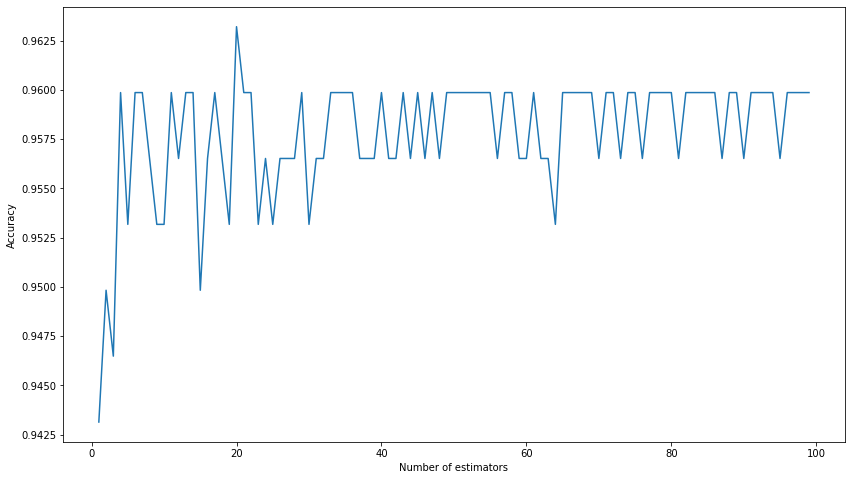

In [126]:
import matplotlib.pyplot as plt

plt.plot(range(1,100), scores)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")